# Assignment 3
write your names here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
def linear_pca(X, k):
    mu=np.mean(X,axis=1)
    X_c=X-np.expand_dims(mu,axis=1)
    [U,Sigma,VT]=np.linalg.svd(X_c,full_matrices=False)
    S=np.expand_dims(Sigma[:k],axis=1)*VT[:k,:]
    S.shape
    return S

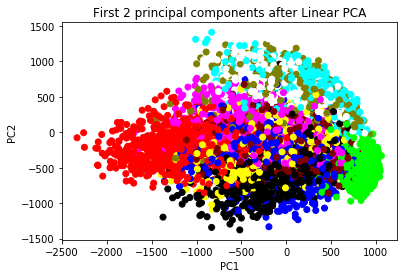

In [3]:
#import a data matrix of each 1000 MNIST images in 10 situations
N=1000
k=2
digit_prefix=['d0','d1','d2','d3','d4','d5','d6','d7','d8','d9']
X=np.zeros((784,10*N))
C=np.zeros((10*N,3))
val_rgb=[[1,0,0],[0,1,0],[0,0,1],[0,0,0],[1,1,1],[1,1,0],[1,0,1],[0,1,1],[0.5,0,0],[0.5,0.5,0]]
for i,dp in enumerate(digit_prefix):
    for j in range(N):
        X[:,i*N+j]=np.float64(imageio.imread('../data/mnist/'+dp+'/'+dp+'_'+'%04d.png'%(j+1)).ravel())
        C[i*N+j]=val_rgb[i]

#linear PCA
S1=linear_pca(X, k)

#reorder indexes for visualization purposes
idx_new=((np.arange(10*N).reshape(10,N).T).reshape(N,10)).ravel()
plt.scatter(S1[0,idx_new],S1[1,idx_new],c=C[idx_new])
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [4]:
def gram_pca(K,k):        
    #Center Gram Matrix
    n = len(K);
    one_n= np.ones(n);
    H = np.identity(n) - (1/n)*one_n*np.transpose(one_n)
    K_c = np.dot(np.dot(H,K),H)
    
    #Eigenvalue decomposition of centered K
    [Lambda, V] = np.linalg.eig(K_c)
    Sigma = np.sqrt(Lambda)
    
    #Define the reduced matrices
    Sigma_k=np.diag(Sigma[:k])
    V_k=V[:,:k]
    
    #Reduce training data
    S=np.dot(Sigma_k,np.transpose(V_k))
    return S

/Users/wendy/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


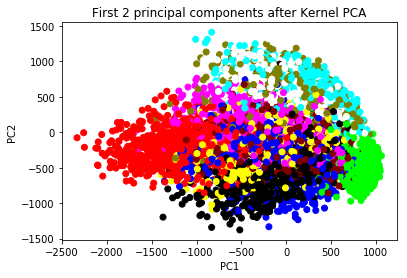

In [5]:
# test gram_pca
K=np.dot(np.transpose(X),X)
S2=gram_pca(K,k)
idx_new=((np.arange(10*N).reshape(10,N).T).reshape(N,10)).ravel()
plt.scatter(S2[0,idx_new],S2[1,idx_new],c=C[idx_new])
plt.title('First 2 principal components after Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [6]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh

def compute_gaussian_gram_matrix(X, sigma):
  # Calculating the squared Euclidean distances for every pair of points
    # in the MxN dimensional dataset.
    sq_dists = pdist(np.transpose(X), 'sqeuclidean')

    # Converting the pairwise distances into a symmetric MxM matrix.
    mat_sq_dists = squareform(sq_dists)

    # Computing the MxM kernel matrix.
    gamma=1/(2*sigma*sigma)
    K = exp(-gamma * mat_sq_dists)   
    return K

def gaussian_kernel_pca(X, k, sigma):
    K=compute_gaussian_gram_matrix(X,sigma)
    S=gram_pca(K,k)
    return S

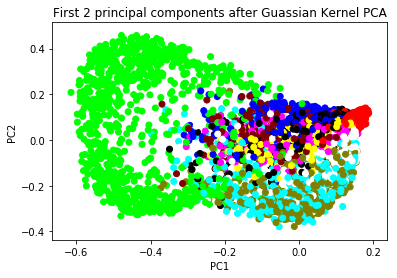

In [7]:
#test gaussian_kernel_pca with MNIST train images
S3=gaussian_kernel_pca(X, k, 1000)
idx_new=((np.arange(10*N).reshape(10,N).T).reshape(N,10)).ravel()
plt.scatter(S3[0,idx_new],S3[1,idx_new],c=C[idx_new])
plt.title('First 2 principal components after Guassian Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()